
### Ex7_카메라 스티커앱 만들기 첫걸음

버전 부르기

In [1214]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

원본사진 불러오기

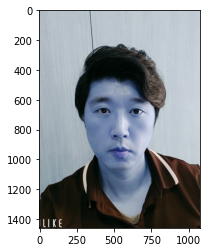

In [1215]:
my_image_path ='/content/drive/MyDrive/images/hgw_1eV.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
plt.imshow(img_bgr)
plt.show()

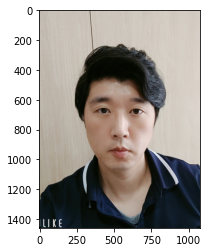

In [1216]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [1217]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector()

In [1218]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(297, 554) (759, 1016)]]


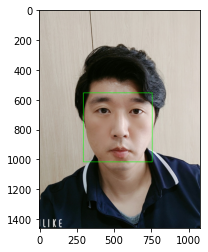

In [1219]:
print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [1220]:
model_path ='/content/drive/MyDrive/images/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [1221]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


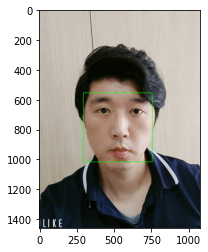

In [1222]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [1252]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]
    y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(69, 118)
(x,y) : (69,-113)
(w,h) : (463,463)


고양이 스티커 이미지 불러오기

In [1224]:
sticker_path ='/content/drive/MyDrive/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(463, 463, 3)


왕관 이미지 불러오기

In [1225]:
sticker_path_2 ='/content/drive/MyDrive/images/king.png'
img_sticker_2 = cv2.imread(sticker_path_2)
img_sticker_2 = cv2.resize(img_sticker_2, (w,h))
print (img_sticker_2.shape)

(463, 463, 3)


고양이 수염 스티커와 왕관 스티커의 원본 이미지에서의 위치 조절하기

In [1247]:
refined_x = x - w //2 
refined_y = y + 50 - h //9
print('(x,y) : (%d,%d)'%(refined_x, refined_y))
refined_x_2 = x - w //2
refined_y_2 = y -25 - h
print('(x_2,y_2) : (%d,%d)'%(refined_x_2, refined_y_2))

(x,y) : (-11,67)
(x_2,y_2) : (-11,-89)


In [1248]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (0,67)


In [1249]:
if refined_x_2 < 0: 
    img_sticker_2 = img_sticker_2[:, -refined_x_2:]
    refined_x_2 = 0
if refined_y_2 < 0:
    img_sticker_2 = img_sticker_2[-refined_y_2:, :]
    refined_y_2 = 0

print ('(x_2,y_2) : (%d,%d)'%(refined_x_2, refined_y_2))

(x_2,y_2) : (0,0)


np.where을 이용하여 스티커 적용하기

In [1251]:
# 길어서 복잡해 보이지만 img_show[from:to] 형식입니다
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
sticker_area_2 = img_show[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]
img_show[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==0,sticker_area_2,img_sticker_2).astype(np.uint8)

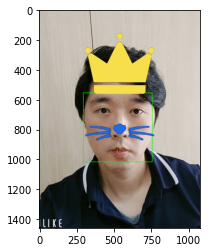

In [1230]:
plt.imshow(cv2.cvtColor(img_show,cv2.COLOR_BGR2RGB))
plt.show()

최종 이미지 만들기

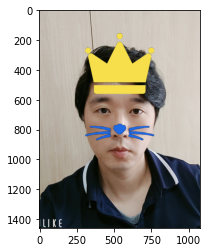

In [1231]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
sticker_area_2 = img_bgr[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]
img_bgr[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==0,sticker_area_2,img_sticker_2).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB))
plt.show()

다른 얼굴 각도에 따른 스티커 적용

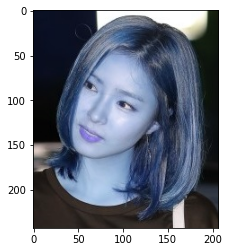

In [1232]:
my_image_path ='/content/drive/MyDrive/images/sinsg.png'
img_bgr_2 = cv2.imread(my_image_path)
img_show_2 = img_bgr_2.copy()
plt.imshow(img_bgr_2)
plt.show()

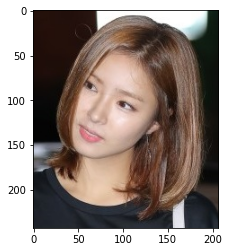

In [1233]:
img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb_2)
plt.show()

In [1234]:
detector_hog = dlib.get_frontal_face_detector()

In [1235]:
img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
dlib_rects_2 = detector_hog(img_rgb_2, 1)   # (image, num of image pyramid)

rectangles[[(26, 66) (116, 156)]]


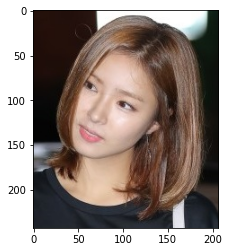

In [1236]:
print(dlib_rects_2)   

for dlib_rect in dlib_rects_2:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb_2 =  cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_2)
plt.show()

In [1237]:
model_path ='/content/drive/MyDrive/images/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [1238]:
list_landmarks = []

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
for dlib_rect in dlib_rects_2:
    points = landmark_predictor(img_rgb_2, dlib_rect)
    # face landmark 좌표를 저장해둡니다
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


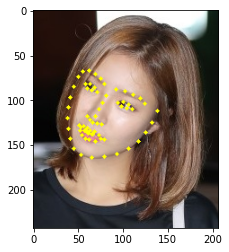

In [1239]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show_2, point, 2, (0, 255, 255), -1)

img_show_rgb_2 = cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb_2)
plt.show()

In [1240]:
for dlib_rect, landmark in zip(dlib_rects_2, list_landmarks):
    print (landmark[30]) # 코의 index는 30 입니다
    x = landmark[30][0]//2
    y = landmark[30][1] - dlib_rect.height()
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(69, 118)
(x,y) : (34,27)
(w,h) : (91,91)


In [1241]:
sticker_path_2 ='/content/drive/MyDrive/images/king.png'
img_sticker_2 = cv2.imread(sticker_path_2)
img_sticker_2 = cv2.resize(img_sticker_2, (w,h))
print (img_sticker_2.shape)

(91, 91, 3)


In [1242]:
refined_x_2 = (x - w //2) + 75
refined_y_2 = y - h + 40
print('(x_2,y_2) : (%d,%d)'%(refined_x_2, refined_y_2))

(x_2,y_2) : (64,-24)


In [1243]:
if refined_x_2 < 0: 
    img_sticker_2 = img_sticker_2[:, -refined_x_2:]
    refined_x_2 = 0
if refined_y_2 < 0:
    img_sticker_2 = img_sticker_2[-refined_y_2:, :]
    refined_y_2 = 0

print ('(x_2,y_2) : (%d,%d)'%(refined_x_2, refined_y_2))

(x_2,y_2) : (64,0)


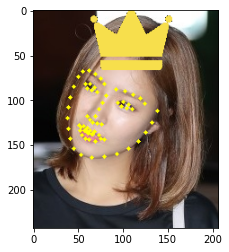

In [1244]:
sticker_area_3 = img_show_2[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]
img_show_2[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==0,sticker_area_3,img_sticker_2).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_show_2,cv2.COLOR_BGR2RGB))
plt.show()

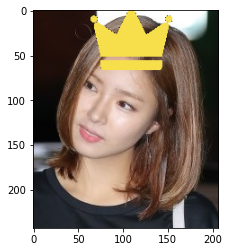

In [1246]:
sticker_area_3 = img_bgr_2[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]
img_bgr_2[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]] = \
    np.where(img_sticker_2==0,sticker_area_3,img_sticker_2).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr_2,cv2.COLOR_BGR2RGB))
plt.show()

회고 : 처음에는 쉬운 작업인줄만 알았던 사진 원본에 스티커를 추가하는 일이 보기보다 어렵다는 걸 깨달았다. 처음에는 고양이 수염 이미지가 원본 사진에 아예 보이지가 않아서 당황했고 그 다음에는 나타나긴 했으나 배경이 흰색이고 오히려 수염이 투명하게 보이는 스티커가 되어 더 당황했다. 문제는 고양이 수염 다운로드 모드에 있었다. 컬렉션으로 다운받아 압축을 풀고 하면 되는 것이 아니라 이미지를 직접 클릭하면 다운로드 받을 수 있었다. 그 후에야 사진에 스티커 이미지가 제대로 표시되었고 그 후 x, y, w, h를 조절해 나가면서 수염이 코에 올때까지 계속 노력했다. 
그런데 한가지. 얼굴의 각도가 일직선이 아닐 때 왕관이 어떻게 쒸워질 것인지에 대해 예제 사진으로 확인해 봤는데 얼굴이 틀어질 경우에 왕관은 일직선을 유지하며 얼굴과 불균형을 이루었다. 아무래도 더 나아가기 위해서는 패턴 인식이 회전 변환을 고려하는 수준까지 가야할 것 같다.